<a href="https://colab.research.google.com/github/vantung20146105/Final-Project-/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from keras.models import Sequential, Model 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
     


In [4]:

# Di chuyển tới thư mục VNMoney
%cd /content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19

/content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19


In [3]:

# Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Khởi tạo dữ liệu cho quá trình training
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training = train_datagen.flow_from_directory('/content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19/train',target_size = (150,150), batch_size = 32,class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19/valid',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1087 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
# Kiểm tra các thuộc tính của tập dữ liệu training
training.class_indices
# Kiểm tra các thuộc tính của tập dữ liệu validation
validation.class_indices
     

{'normal': 0, 'virus': 1}

In [7]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
# Biên dịch 
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics = 'accuracy'
)
model.summary()
# Tiến hành quá trình training
train = model.fit(training,epochs = 30,validation_data=validation,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:

# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.10591121017932892
Train Accuracy 0.9613615274429321


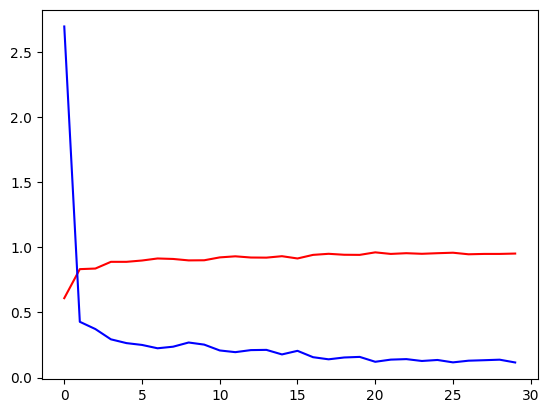

In [10]:

# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
import matplotlib.pyplot as plt
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot( epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot( epochs, loss, 'b', label = 'Training loss')
plt.show()
     

In [11]:

# Lưu 
from google.colab import drive
model.save('Covid-19.h5')

In [12]:

# Load model vừa lưu
from tensorflow.keras.models import load_model
model_1=load_model('/content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19/Covid-19.h5')

1/1 [==============================] - 0s 19ms/step
virus


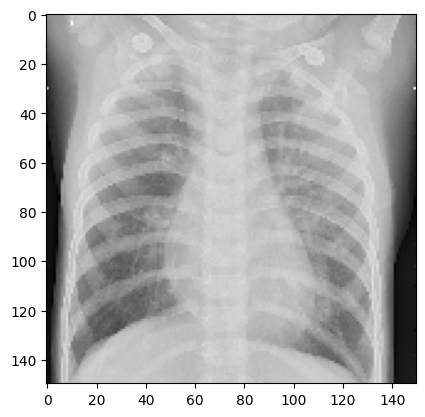

1/1 [==============================] - 0s 20ms/step
normal


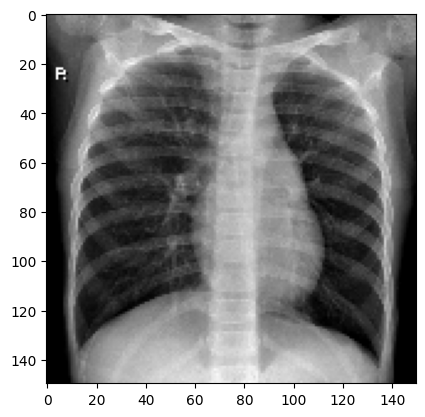

In [15]:
    

# Chạy thử kết quả
test="/content/drive/MyDrive/ Diagnostic-Covid 19/COVID_19/test"

for i in listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['normal', 'virus']
  print(class_name[result])
  plt.show()
     